In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
import pandas as pd

In [ ]:
data=scipy.io.loadmat('/content/drive/MyDrive/Dataset/Prostate_Tumor.mat')

In [ ]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jun 23 13:56:18 2003', '__version__': '1.0', '__globals__': [], 'data': array([[  1. ,   6.1,  -0.1, ...,  14. ,  19.3,  37.3],
       [  1. ,   1. ,   0. , ...,   6. ,   6. ,  26. ],
       [  1. ,  22. ,   2. , ..., -13. , -10. , -21. ],
       ...,
       [  0. ,  -4. ,   1. , ...,   1. ,   2. ,  24. ],
       [  0. ,   0. ,   0. , ...,   5. ,  -6. ,  25. ],
       [  0. ,   4. ,   0. , ...,   9. ,   3. ,  21. ]])}


In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
data['data'].shape

(102, 10510)

In [ ]:
frame=pd.DataFrame(data['data'])

In [ ]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,10500,10501,10502,10503,10504,10505,10506,10507,10508,10509
0,1.0,6.1,-0.1,11.9,14.4,6.0,-15.1,12.7,1731.0,3.1,...,12.3,72.8,4.1,2.5,5.0,22.5,7.3,14.0,19.3,37.3
1,1.0,1.0,0.0,2.0,4.0,0.0,0.0,6.0,1656.0,1.0,...,7.0,25.0,10.0,2.0,4.0,5.0,1.0,6.0,6.0,26.0
2,1.0,22.0,2.0,51.0,52.0,25.0,-20.0,70.0,3600.0,15.0,...,25.0,111.0,-66.0,12.0,14.0,59.0,16.0,-13.0,-10.0,-21.0
3,1.0,14.0,6.0,15.0,21.0,11.0,-17.0,38.0,2554.0,12.0,...,14.0,129.0,-14.0,0.0,23.0,35.0,5.0,25.0,-27.0,0.0
4,1.0,13.0,4.0,39.0,25.0,12.0,-17.0,36.0,5676.0,17.0,...,21.0,94.0,-41.0,16.0,18.0,49.0,29.0,32.0,30.0,-13.0


In [ ]:
frame.columns

RangeIndex(start=0, stop=10510, step=1)

In [ ]:
frame[0].value_counts()

,count
0,
0.0,52
1.0,50


In [ ]:
x=frame.drop([0],axis=1)

In [ ]:
y=frame[0]

In [ ]:
x.shape

(102, 10509)

In [ ]:
y.shape

(102,)

SPLITIING INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape,y_train.shape

((81, 10509), (81,))

In [ ]:
x_test.shape,y_test.shape

((21, 10509), (21,))

In [ ]:
y_train.value_counts()

,count
0,
1.0,44
0.0,37


In [ ]:
y_test.value_counts()

,count
0,
0.0,15
1.0,6


MODEL GENERATION


In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve, roc_auc_score

In [ ]:
error=mean_squared_error(y_test,pred)
print(error)

0.09523809523809523


In [ ]:
linscore=cross_validate(lr,x_train,y_train,cv=10,scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
linscore

{'fit_time': array([1.53801394, 4.47694564, 1.99145389, 1.41897845, 1.09601784,
        0.72392011, 1.22644758, 1.18937874, 0.9896791 , 1.09577203]),
 'score_time': array([0.1614759 , 0.18270445, 0.14147496, 0.13157105, 0.13110137,
        0.14321041, 0.14317107, 0.13980842, 0.14353108, 0.14040804]),
 'test_score': array([0.88888889, 0.875     , 0.875     , 1.        , 1.        ,
        1.        , 1.        , 0.875     , 1.        , 1.        ])}

In [ ]:
cm=confusion_matrix(y_test, pred)
print(cm)

[[14  1]
 [ 1  5]]


In [ ]:
df_cm = pd.DataFrame(cm, columns=np.unique(pred), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

In [ ]:
df_cm

Predicted,0.0,1.0
Actual,,
0.0,14,1
1.0,1,5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred)

In [ ]:
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, pred))

roc_auc_score for LogisticRegression:  0.8833333333333334


In [ ]:
import matplotlib.pyplot as plt

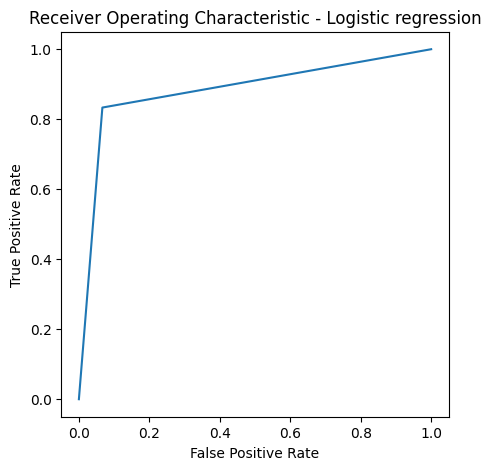

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()